In [152]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [153]:
data = pd.read_csv('intermediate_datafiles/chapter2_result.csv',parse_dates=['Unnamed: 0'])
data.rename(columns={'Unnamed: 0': 'timestamp'})

,timestamp,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,...,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure
0,2016-02-08 18:28:25.656222395,-0.090431,0.164098,9.631765,9.550844,0.197689,1.513422,-0.008824,0.018529,-0.001647,...,0,0,NaN,-73.134000,-138.000000,-29.022000,-6.681818,59.000000,-23.318182,1029.0410
1,2016-02-08 18:28:25.906222395,-0.097600,0.167640,9.631740,9.552667,0.189271,1.511000,-0.008800,0.018540,-0.001540,...,0,0,1084.0,-73.877500,-139.552500,-28.970000,-6.375000,59.000000,-23.708333,1029.1320
2,2016-02-08 18:28:26.156222395,-0.089120,0.167520,9.637300,9.549745,0.194588,1.517431,-0.008880,0.018340,-0.002420,...,0,0,1084.0,-76.401600,-141.259200,-28.555200,-6.038462,58.076923,-25.538462,1029.2820
3,2016-02-08 18:28:26.406222395,-0.090135,0.166019,9.632538,9.552022,0.200000,1.498267,-0.008962,0.018288,-0.002038,...,0,0,1086.0,-76.804615,-141.133846,-28.954615,-5.958333,58.291667,-24.125000,1029.3690
4,2016-02-08 18:28:26.656222395,-0.090608,0.167686,9.630078,9.550375,0.200771,1.504312,-0.008760,0.018800,-0.002260,...,0,0,1084.0,-76.740000,-141.314400,-28.795200,-6.260870,59.260870,-23.478261,1029.2680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31833,2016-02-08 20:41:03.906222395,-0.163020,0.184061,9.609571,NaN,NaN,NaN,-0.008592,0.021347,0.002082,...,0,0,NaN,-69.600000,27.660000,-10.533333,NaN,NaN,NaN,NaN
31834,2016-02-08 20:41:04.156222395,-0.162686,0.185196,9.611863,NaN,NaN,NaN,-0.008745,0.021294,0.002000,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1011.0085
31835,2016-02-08 20:41:04.406222395,-0.159980,0.186800,9.615020,NaN,NaN,NaN,-0.008480,0.020960,0.002200,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1011.0760
31836,2016-02-08 20:41:04.656222395,-0.158882,0.184333,9.613510,NaN,NaN,NaN,-0.008529,0.020882,0.002314,...,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1010.8450


In [165]:
len(data[np.isnan(data['hr_watch_rate'])]) / len(data) # perc missing value heart rate

0.7640869401344306

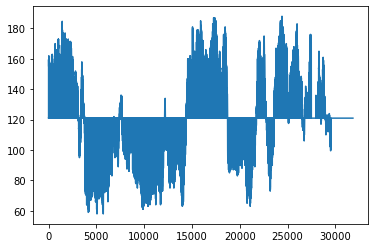

In [169]:
imp = SimpleImputer(strategy="mean")
data_hr_transf = np.array(data['hr_watch_rate']).reshape(-1,1)
hr_mean = imp.fit_transform(data_hr_transf)
plt.plot(hr_mean)

In [157]:
hr_new = np.zeros(len(data))
while sum(hr_new == 0) > 0:
    for i in range(len(data['hr_watch_rate'])-1):
        if i == len(data)-2:
            hr_new[i] = hr_new[i-1]
            hr_new[i+1] = hr_new[i-1]
        if np.isnan(data['hr_watch_rate'][i]):
            if hr_new[i+1] == 0:
                hr_new[i] = hr_new[i-1]
            else:
                hr_new[i] = hr_new[i+1]
        else:
            hr_new[i] = data['hr_watch_rate'][i]   

In [158]:
data['hr_watch_rate_imputed'] = hr_new

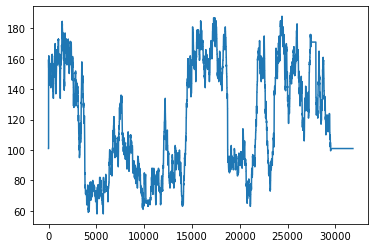

In [164]:
plt.plot(data['hr_watch_rate_imputed'])